In [1]:
import pandas as pd
import seaborn as sb
import numpy as np

In [31]:
df = pd.read_csv("simulated_annealing_on_path_groups.csv", sep="|")
df

,group_id,planned_time,real_time,travel_cost,delay,delay_in_%,waiting_time,in_trip_time,walks,path
0,1052,221,281,57,60,27,13,199,0,Davos Monstein.7843.Departure->40846.5.Trip->D...
1,1051,221,281,57,60,27,13,199,0,Davos Monstein.7843.Departure->40846.5.Trip->D...
2,1053,169,169,47,0,0,6,118,2,München ZOB (Hackerbrücke).7861.Arrival->.12.W...
3,1054,169,169,47,0,0,6,118,2,München ZOB (Hackerbrücke).7861.Arrival->.12.W...
4,1049,169,169,50,0,0,2,117,2,München ZOB (Hackerbrücke).7861.Arrival->.12.W...
...,...,...,...,...,...,...,...,...,...,...
1047,2,86,146,38,60,69,12,94,0,Duisburg Hbf.7733.Arrival->137653.37.Trip->Dor...
1048,1,2,64,26,62,3100,12,33,1,München Hbf.7746.Arrival->.14.Walk->München Hb...
1049,12,239,360,49,121,50,9,291,1,München Leuchtenbergring.7920.Departure->10678...
1050,7,169,169,47,0,0,5,118,2,München ZOB (Hackerbrücke).7861.Arrival->.12.W...


# Calculate different delay cost metrics

In [32]:
print("Total delay:", df["delay"].sum(), "min", "=", df["delay"].sum()/60, "h")
print("Average delay:", np.mean(df["delay"]), "min", "=", np.mean(df["delay"])/60, "h")
print("Median delay:", np.median(df["delay"]), "min", "=", np.median(df["delay"])/60, "h")
print("\n###########################\n")
print("Min delay:", df["delay"].min(), "min", "=", df["delay"].min()/60, "h:")
display(df[df["delay"] == df["delay"].min()])
path = df[df["delay"] == df["delay"].min()]["path"].iloc[0]
print(path)
print("\n###########################\n")
print("Max delay:", df["delay"].max(), "min", "=", df["delay"].max()/60, "h:")
display(df[df["delay"] == df["delay"].max()])
path = df[df["delay"] == df["delay"].max()]["path"].iloc[0]
print(path)
print("\n###########################\n")
print("Average % delay:", np.mean(df["delay_in_%"]), "%")
print("Median % delay:", np.median(df["delay_in_%"]), "%")
print("Min % delay:", df["delay_in_%"].min(), "%")
print("Max % delay:", df["delay_in_%"].max(), "%")

Total delay: 44200 min = 736.6666666666666 h
Average delay: 42.01520912547529 min = 0.7002534854245881 h
Median delay: 29.5 min = 0.49166666666666664 h

###########################

Min delay: -239 min = -3.9833333333333334 h:


,group_id,planned_time,real_time,travel_cost,delay,delay_in_%,waiting_time,in_trip_time,walks,path
640,412,320,81,34,-239,-74,22,35,0,München Hbf.7714.Departure->75222.8.Trip->Münc...


München Hbf.7714.Departure->75222.8.Trip->München Ost.7722.Arrival->München Ost.7742.Departure->107586.27.Trip->Ottenhofen(Oberbay).7769.Arrival

###########################

Max delay: 1268 min = 21.133333333333333 h:


,group_id,planned_time,real_time,travel_cost,delay,delay_in_%,waiting_time,in_trip_time,walks,path
748,302,620,1888,70,1268,204,20,763,2,Ceska Lipa - Holy vrch.7772.Departure->139864....


Ceska Lipa - Holy vrch.7772.Departure->139864.38.Trip->Decin hl.n..7810.Arrival->Decin hl.n..7826.Departure->139751.102.Trip->Praha hl.n..7928.Arrival->Praha hl.n..7953.Departure->2098.252.Trip->Regensburg Hbf.8205.Arrival->.935.Walk->Regensburg Bahnhofstraße (Fernbushalt).9140.Departure->137154.69.Trip->Waidhaus(Gr).9209.Arrival->Waidhaus(Gr).9310.Departure->137174.90.Trip->Nürnberg ZOB.9400.Arrival->.20.Walk->Nürnberg Hbf.9420.Departure->137501.124.Trip->Frankfurt(Main)Hbf.9544.Arrival->Frankfurt(Main)Hbf.9561.Departure->99875.63.Trip->Cölbe.9624.Arrival->Cölbe.9635.Departure->104907.25.Trip->Ernsthausen.9660.Arrival

###########################

Average % delay: 50.606463878327 %
Median % delay: 15.0 %
Min % delay: -74 %
Max % delay: 3100 %


<AxesSubplot:xlabel='delay_in_%', ylabel='Count'>

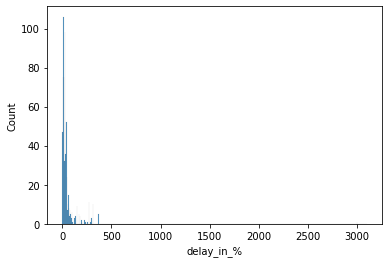

In [37]:
sb.histplot(df, x="delay_in_%", bins=range(1, df["delay_in_%"].max()+1, 5))

<AxesSubplot:xlabel='delay_in_%', ylabel='Count'>

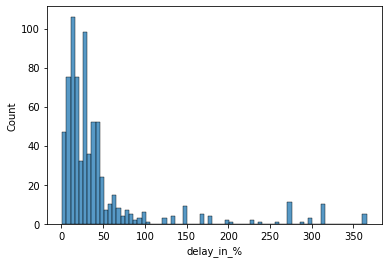

In [38]:
sb.histplot(df, x="delay_in_%", bins=range(1, sorted(df["delay_in_%"])[-10]+1, 5))

# Calculate different travel cost metrics

In [39]:
print("Total travel cost:", df["travel_cost"].sum())
print("Average travel cost:", np.mean(df["travel_cost"]))
print("Median travel cost:", np.median(df["travel_cost"]))
print("Min travel cost:", df["travel_cost"].min())
print("Max travel cost:", df["travel_cost"].max())

Total travel cost: 51075
Average travel cost: 48.55038022813688
Median travel cost: 46.0
Min travel cost: 1
Max travel cost: 359


In [40]:
print("Total number of walks:", df["walks"].sum())
print("Average number of walks:", np.mean(df["walks"]))
print("Median number of walks:", np.median(df["walks"]))
print("Min number of walks:", df["walks"].min())
print("Max number of walks:", df["walks"].max())

Total number of walks: 773
Average number of walks: 0.7347908745247148
Median number of walks: 1.0
Min number of walks: 0
Max number of walks: 3


In [41]:
print("Total waiting time:", df["waiting_time"].sum())
print("Average waiting time:", np.mean(df["waiting_time"]))
print("Median waiting time:", np.median(df["waiting_time"]))
print("Min waiting time:", df["waiting_time"].min())
print("Max waiting time:", df["waiting_time"].max())

Total waiting time: 16364
Average waiting time: 15.55513307984791
Median waiting time: 10.0
Min waiting time: 0
Max waiting time: 322


In [42]:
print("Total time in train:", df["in_trip_time"].sum())
print("Average time in train:", np.mean(df["in_trip_time"]))
print("Median time in train:", np.median(df["in_trip_time"]))
print("Min time in train:", df["in_trip_time"].min())
print("Max time in train:", df["in_trip_time"].max())

Total time in train: 220489
Average time in train: 209.5903041825095
Median time in train: 173.0
Min time in train: 2
Max time in train: 763


# Calculate different edge cost metrics

In [43]:
df = pd.read_csv("simulated_annealing_on_path_edges.csv", sep="|")
df

,edge_index,duration,capacity,utilization
0,EdgeIndex(2480403),2,270,16
1,EdgeIndex(3410623),30,282,25
2,EdgeIndex(2562241),2,399,6
3,EdgeIndex(2022389),4,313,24
4,EdgeIndex(3366111),8,204,2
...,...,...,...,...
4104,EdgeIndex(317331),10,137,5
4105,EdgeIndex(3395229),38,1,17
4106,EdgeIndex(2685083),4,161,27
4107,EdgeIndex(326739),3,151,1


In [47]:
print("Number of strained trip edges:", len(df))
df_filtered = df[df['capacity'] < df['utilization']].loc[:]
print("Number of strained trip edges with utilization > capacity:", len(df_filtered))
df_filtered["overload"] = df_filtered["utilization"]-df_filtered["capacity"]
print("Total overload (only edges with utilization > capacity):", df_filtered["overload"].sum())
print("Average overload (only edges with utilization > capacity):", np.mean(df_filtered["overload"]))
print("Median overload (only edges with utilization > capacity):", np.median(df_filtered["overload"]))
print("Max overload of one edge:", df_filtered["overload"].max())
df_filtered

Number of strained trip edges: 4109
Number of strained trip edges with utilization > capacity: 195
Total overload (only edges with utilization > capacity): 1614
Average overload (only edges with utilization > capacity): 8.276923076923078
Median overload (only edges with utilization > capacity): 5.0
Max overload of one edge: 61


,edge_index,duration,capacity,utilization,overload
22,EdgeIndex(1749639),9,0,11,11
79,EdgeIndex(3413931),36,0,16,16
89,EdgeIndex(1732977),28,0,3,3
94,EdgeIndex(2156597),4,0,8,8
116,EdgeIndex(1767103),30,0,6,6
...,...,...,...,...,...
3969,EdgeIndex(2794149),5,0,5,5
3980,EdgeIndex(50367),24,0,3,3
4000,EdgeIndex(324161),4,0,5,5
4028,EdgeIndex(2157389),7,0,5,5


<AxesSubplot:xlabel='overload', ylabel='Count'>

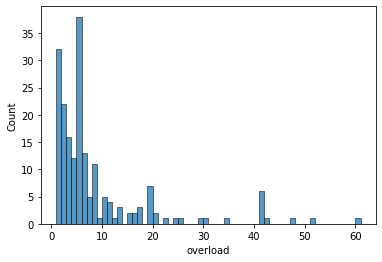

In [48]:
sb.histplot(df_filtered, x="overload", bins=range(1, df_filtered["overload"].max()+1))